### Nguyễn Hải Lâm

In [ ]:
! pip install pandas
! pip install matplotlib
! pip install seaborn
! pip install plotly
! pip install nbformat --upgrade

In [1]:
import pandas as pd
data = pd.read_csv('AB_NYC_2019 (1).csv')

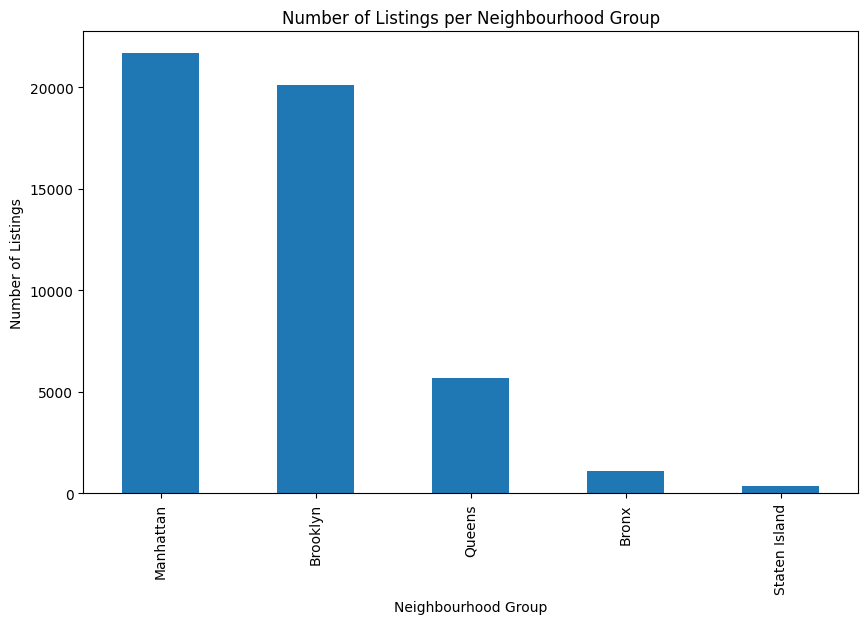

In [4]:
import matplotlib.pyplot as plt

neighbourhood_group_counts = data['neighbourhood_group'].value_counts()

plt.figure(figsize=(10, 6))
neighbourhood_group_counts.plot(kind='bar')
plt.title('Number of Listings per Neighbourhood Group')
plt.xlabel('Neighbourhood Group')
plt.ylabel('Number of Listings')
plt.show()


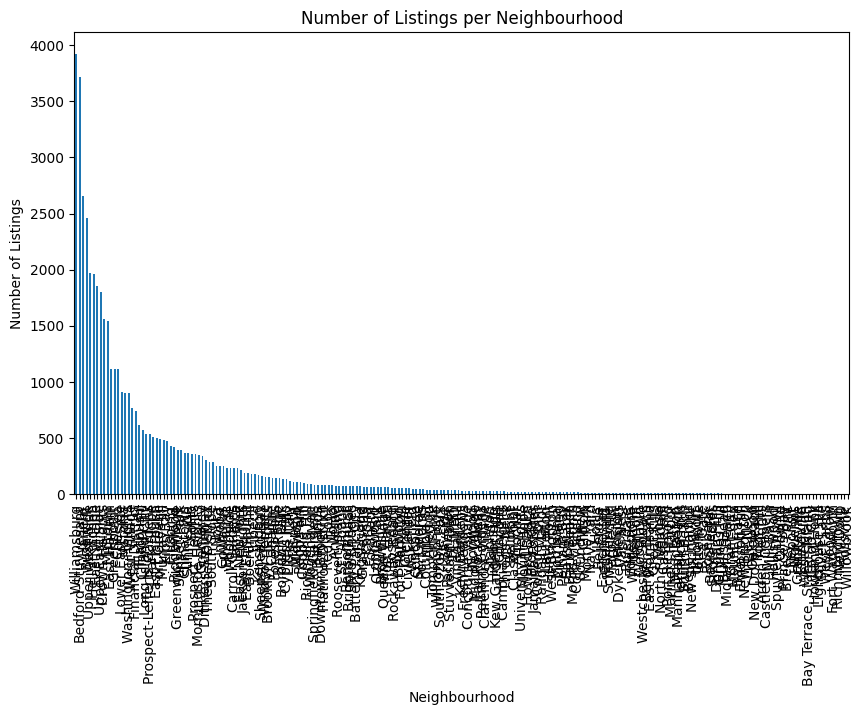

In [5]:
plt.figure(figsize=(10, 6))
data['neighbourhood'].value_counts().plot(kind='bar')
plt.title('Number of Listings per Neighbourhood')
plt.xlabel('Neighbourhood')
plt.ylabel('Number of Listings')
plt.show()


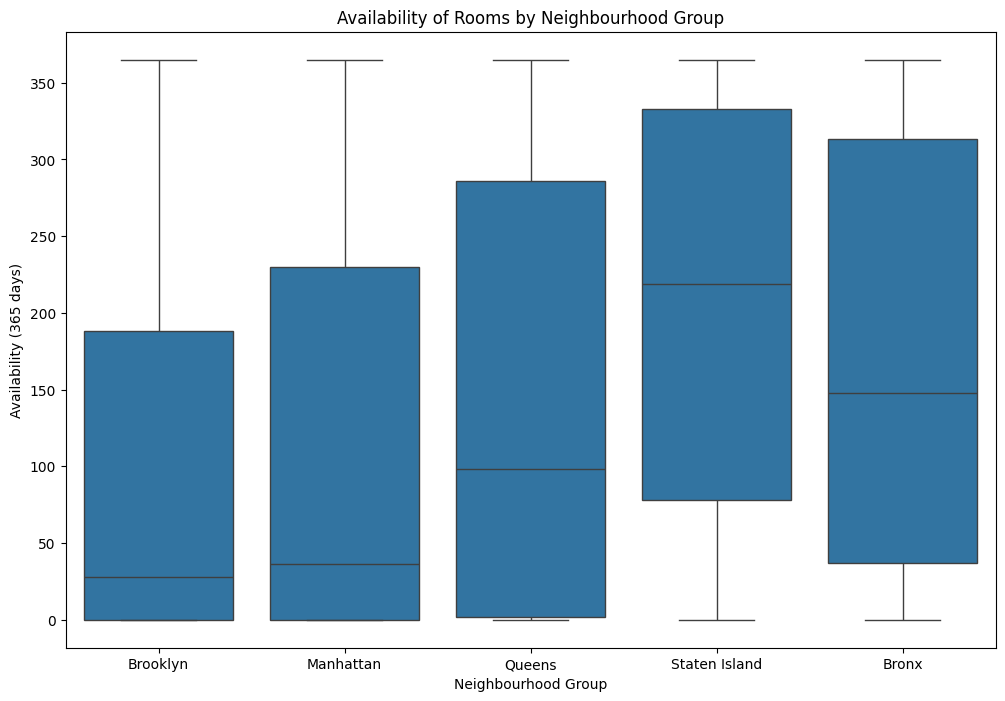

In [8]:
import seaborn as sns

plt.figure(figsize=(12, 8))
sns.boxplot(x='neighbourhood_group', y='availability_365', data=data)
plt.title('Availability of Rooms by Neighbourhood Group')
plt.xlabel('Neighbourhood Group')
plt.ylabel('Availability (365 days)')
plt.show()


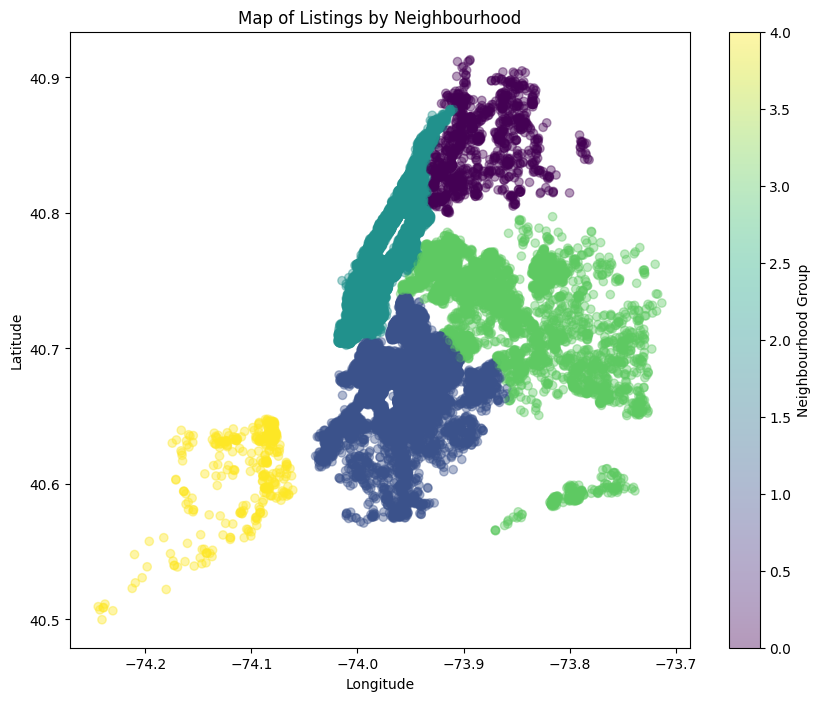

In [9]:
plt.figure(figsize=(10, 8))
plt.scatter(data['longitude'], data['latitude'], alpha=0.4, c=data['neighbourhood_group'].astype('category').cat.codes, cmap='viridis')
plt.title('Map of Listings by Neighbourhood')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.colorbar(label='Neighbourhood Group')
plt.show()


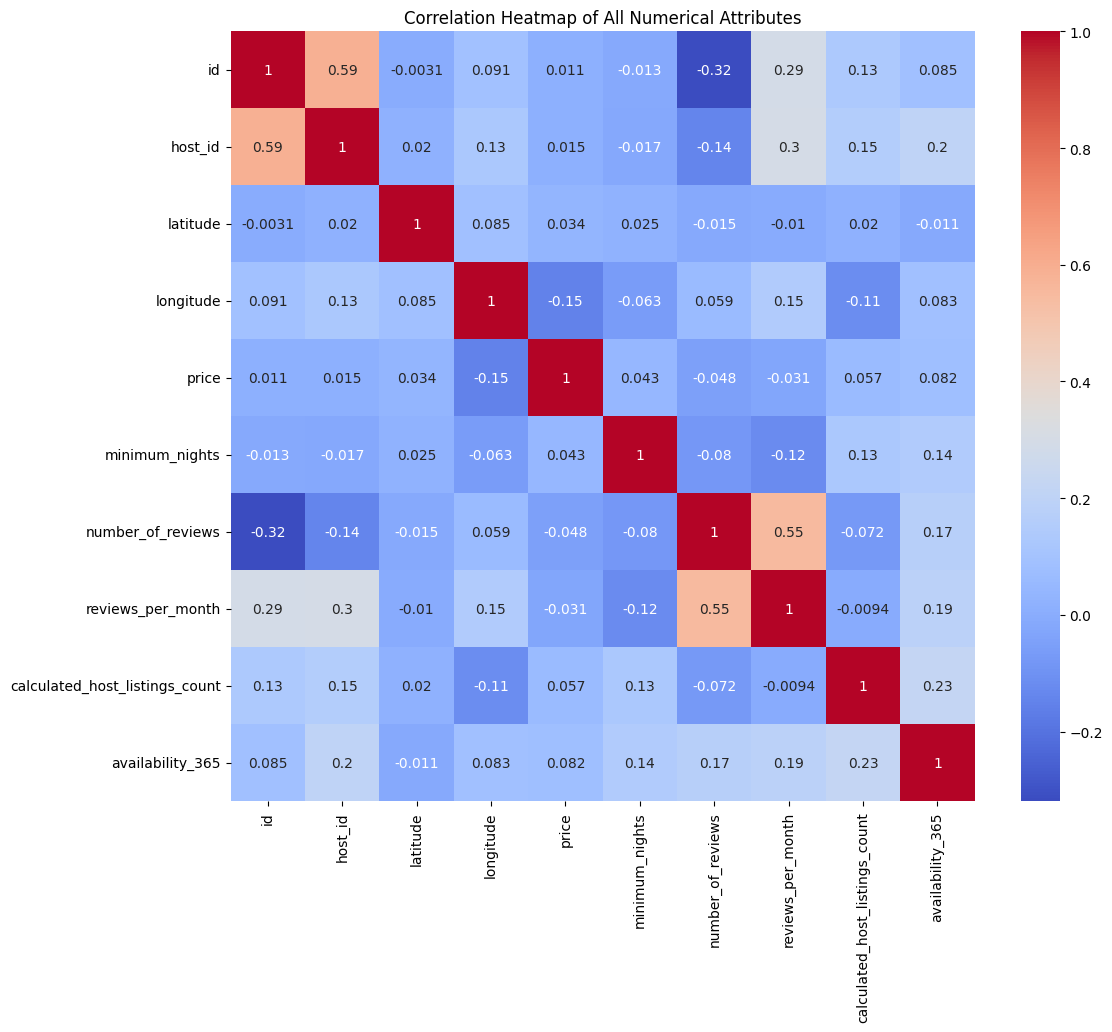

In [11]:
numerical_data = data.select_dtypes(include=['float64', 'int64'])

plt.figure(figsize=(12, 10))
sns.heatmap(numerical_data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of All Numerical Attributes')
plt.show()


In [18]:
import plotly.express as px

fig = px.scatter_mapbox(data, lat="latitude", lon="longitude", hover_name="name", hover_data=["price"],
                        color="price", size="price", color_continuous_scale=px.colors.cyclical.IceFire, size_max=15, zoom=10)
fig.update_layout(mapbox_style="carto-positron")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})

fig.write_html("room_prices_map.html")
